In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define Feedforward Neural Network
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = FeedForwardNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Testing
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")


100%|██████████| 9.91M/9.91M [00:00<00:00, 128MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 41.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 124MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


Epoch 1, Loss: 0.4191
Epoch 2, Loss: 0.1967
Epoch 3, Loss: 0.1437
Epoch 4, Loss: 0.1151
Epoch 5, Loss: 0.1007
Accuracy on test set: 96.16%


Saving images-2.png to images-2 (1).png
Saving images-3.png to images-3 (1).png
Saving images.png to images (1).png
File: images-2 (1).png, Predicted digit: 3


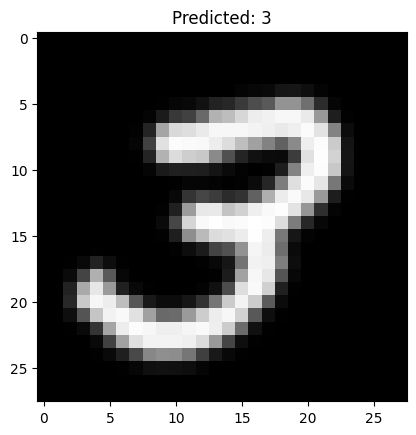

File: images-3 (1).png, Predicted digit: 5


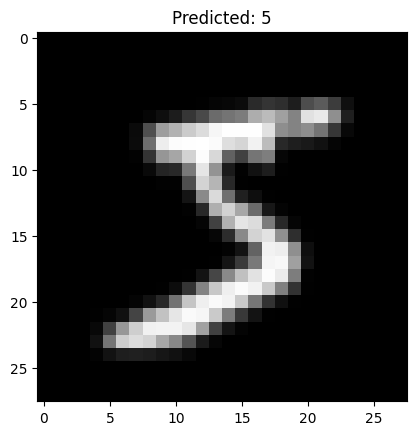

File: images (1).png, Predicted digit: 7


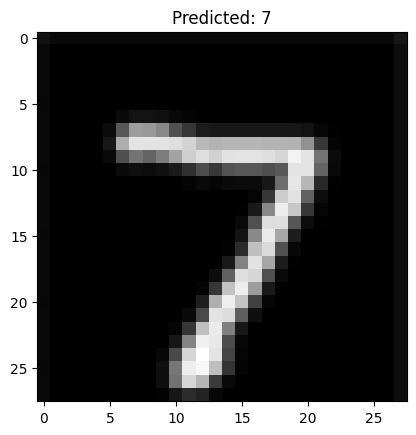

In [5]:
from PIL import Image
import torchvision.transforms as transforms
import torch
from google.colab import files
import matplotlib.pyplot as plt

# Load trained model
model.eval()

# Preprocessing transform (same as training)
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Upload multiple images
uploaded = files.upload()  # Will open a file dialog in Colab

for filename in uploaded.keys():
    # Load image
    img = Image.open(filename).convert("L")
    img_tensor = transform(img)
    img_tensor = img_tensor.view(-1, 28*28)  # Flatten for feedforward network

    # Predict
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)

    print(f"File: {filename}, Predicted digit: {predicted.item()}")

    # Display image with prediction
    plt.imshow(img_tensor.view(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted.item()}")
    plt.show()
